In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
df = pd.read_csv("/content/sample_data/Aseries_allcap_drv_logpage_Dec'24_superset 1.csv")

print(df.shape)
print(df.head())

(49424, 30)
         dt           asup_id   dvc_serial_no         dvc_model  \
0  20241228  2024122823230446  S6CWNE0W702048  X4014S173A15TNTE   
1  20241228  2024122815412865  S60NNA0T302895  X4011S17333T8NTE   
2  20241229  2024122901110198  S60SNE0T100519  X4014S173315TNTE   
3  20241228  2024122823420117  S60PNE0N500113  X4010S17331T9NTE   
4  20241228  2024122822360030  S6CWNE0W701834  X4014S173A15TNTE   

   sys_serial_no sys_model  system_id dvc_disk_type dvc_label       disk_id  \
0   792342000065  AFF-A900  538069167       SSD-NVM    SHARED  e10a.11.2.13   
1   792212000967  AFF-A700  537422005       SSD-NVM    SHARED    e3b.01.3.0   
2   952201002085  AFF-A800  538230316       SSD-NVM    SHARED         0n.47   
3   952021000095  AFF-A800  538151834       SSD-NVM    SHARED         0n.13   
4   792342000040  AFF-A900  538069211       SSD-NVM    SHARED  e10a.31.2.14   

   ...                             aggr_uuid  is_root  \
0  ...  5e761a9f-cb80-4512-8b96-14590d825088    False

In [70]:
# Remove duplicates
df = df.drop_duplicates()

# Fix dtypes
df['dt'] = pd.to_datetime(df['dt'])

# Detect incorrect dtypes
print(df.dtypes)

# Missing values
print(df.isna().sum())


dt                              datetime64[ns]
asup_id                                  int64
dvc_serial_no                           object
dvc_model                               object
sys_serial_no                            int64
sys_model                               object
system_id                                int64
dvc_disk_type                           object
dvc_label                               object
disk_id                                 object
dvc_primary_port                        object
power_on_hours                           int64
rated_life_used                          int64
available_spares_percentage              int64
dvc_glist_ct                             int64
average_erase_block_count                int64
max_erase_block_count                    int64
host_write_block_count                   int64
total_nand_write_block_count             int64
aggr_name                               object
aggr_uuid                               object
is_root      

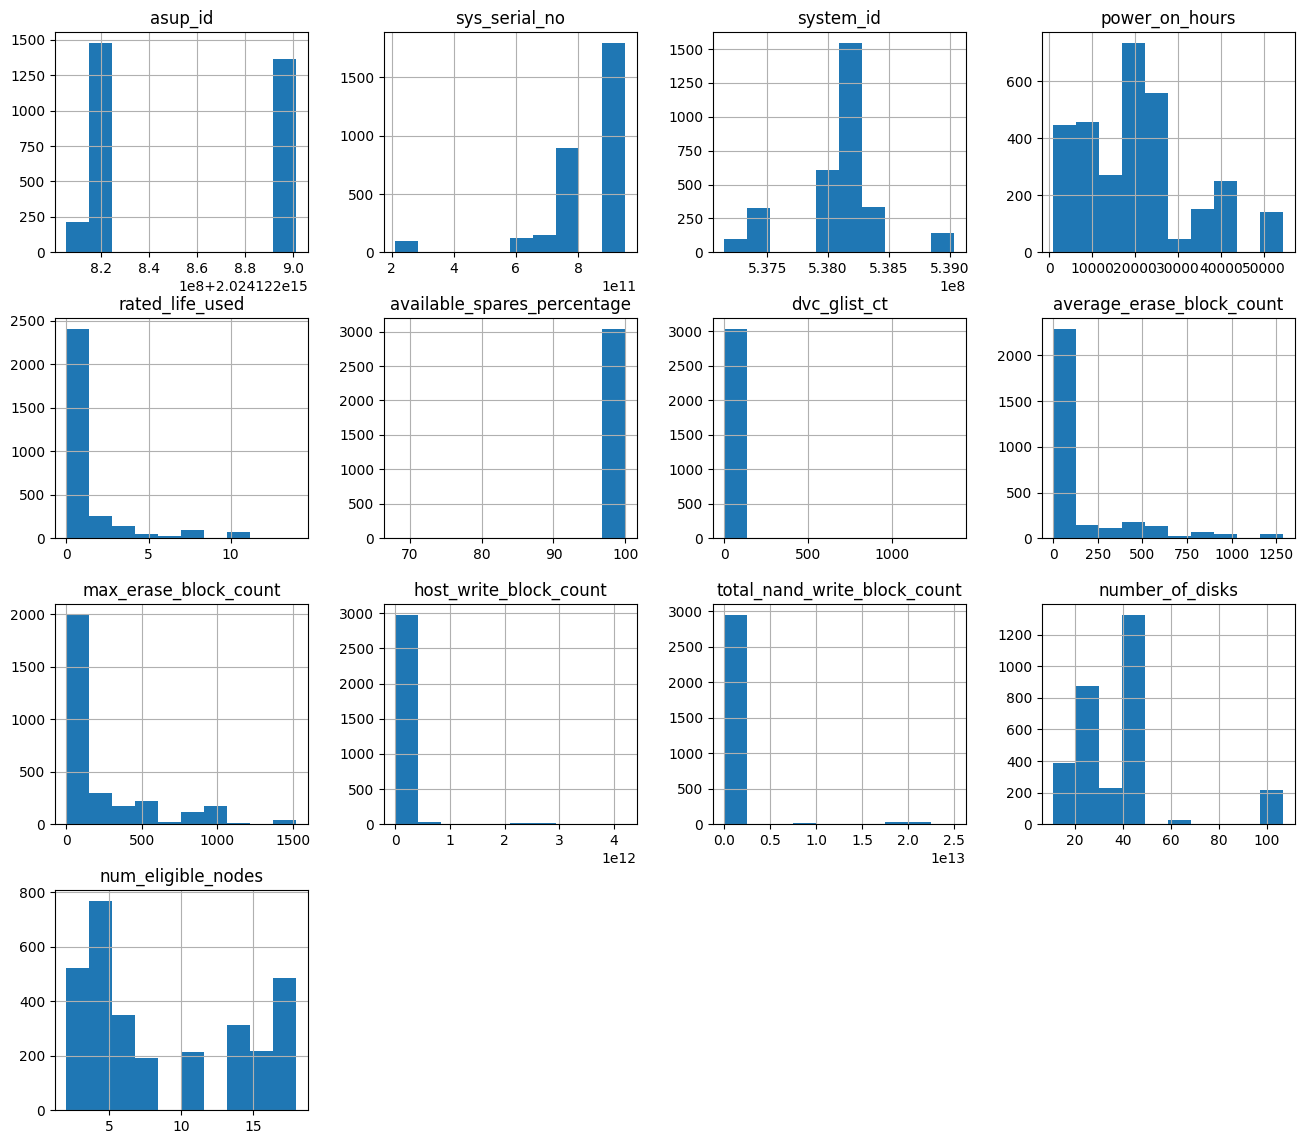

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric histograms
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(figsize=(16,14))
plt.savefig('numeric_histograms.png')
plt.show()

# Boxplots for outliers
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.savefig(f'boxplot_{col}.png')
    #plt.show()
    plt.close()

#bar plot
cat_cols = df.select_dtypes(include='object').columns
small_cats = [c for c in cat_cols if df[c].nunique() <= 15]

for col in small_cats:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.savefig(f'barplot_{col}.png')
    #plt.show()
    plt.close()

#numeric-vs-numeric scatterplots
num_cols = df.select_dtypes(include='number').columns
for i, col1 in enumerate(num_cols):
    for col2 in num_cols[i+1:]:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col1], y=df[col2], s=10)
        plt.title(f"{col1} vs {col2}")
        plt.savefig(f'scatterplot_{col1}_{col2}.png')
        #plt.show()
        plt.close()

In [72]:
# Numeric summary
print(df.describe())

# Categorical summary
for col in cat_cols:
    print(col)
    print(df[col].value_counts(normalize=True).head(10))
    print()

                                  dt       asup_id  sys_serial_no  \
count                           3056  3.056000e+03   3.056000e+03   
mean   1970-01-01 00:00:00.020241228  2.024123e+15   8.577673e+11   
min    1970-01-01 00:00:00.020241228  2.024123e+15   2.120150e+11   
25%    1970-01-01 00:00:00.020241228  2.024123e+15   7.923070e+11   
50%    1970-01-01 00:00:00.020241228  2.024123e+15   9.520130e+11   
75%    1970-01-01 00:00:00.020241229  2.024123e+15   9.522020e+11   
max    1970-01-01 00:00:00.020241229  2.024123e+15   9.524160e+11   
std                              NaN  4.143071e+07   1.499410e+11   

          system_id  power_on_hours  rated_life_used  \
count  3.056000e+03     3056.000000      3056.000000   
mean   5.381088e+08    20122.671466         1.031086   
min    5.371480e+08      919.000000         0.000000   
25%    5.380692e+08     9705.000000         0.000000   
50%    5.381569e+08    20729.000000         0.000000   
75%    5.382353e+08    23783.000000       

In [73]:
# Missing
missing = df.isna().sum().sort_values(ascending=False)
print(missing)
#no missing

dt                              0
asup_id                         0
dvc_serial_no                   0
dvc_model                       0
sys_serial_no                   0
sys_model                       0
system_id                       0
dvc_disk_type                   0
dvc_label                       0
disk_id                         0
dvc_primary_port                0
power_on_hours                  0
rated_life_used                 0
available_spares_percentage     0
dvc_glist_ct                    0
average_erase_block_count       0
max_erase_block_count           0
host_write_block_count          0
total_nand_write_block_count    0
aggr_name                       0
aggr_uuid                       0
is_root                         0
disklist                        0
number_of_disks                 0
raid_group                      0
rg_type                         0
hostname                        0
cluster_id                      0
local_node_uuid                 0
num_eligible_n

In [74]:
#outlier analysis
# Z-score method
z = np.abs((df[num_cols] - df[num_cols].mean()) / df[num_cols].std())
outliers = (z > 3).sum()
print(outliers)

# IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(col, len(out))

asup_id                          0
sys_serial_no                   96
system_id                        0
power_on_hours                   0
rated_life_used                 82
available_spares_percentage     16
dvc_glist_ct                    12
average_erase_block_count       94
max_erase_block_count           47
host_write_block_count          45
total_nand_write_block_count    79
number_of_disks                  0
num_eligible_nodes               0
dtype: int64
asup_id 0
sys_serial_no 96
system_id 568
power_on_hours 142
rated_life_used 393
available_spares_percentage 49
dvc_glist_ct 190
average_erase_block_count 597
max_erase_block_count 306
host_write_block_count 421
total_nand_write_block_count 505
number_of_disks 216
num_eligible_nodes 0


In [75]:
from scipy.stats import boxcox
import numpy as np

# Log transform skewed columns
skewed = df[num_cols].skew().sort_values(ascending=False)
skewed_cols = skewed[skewed > 1].index

for col in skewed_cols:
    df[col+"_log"] = np.log1p(df[col])


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled = StandardScaler().fit_transform(df[num_cols])

pca = PCA(n_components=5)
pca_components = pca.fit_transform(scaled)

print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.31759223 0.17128859 0.13744496 0.11315929 0.07299178]


                       feature1                      feature2      corr
63    average_erase_block_count         max_erase_block_count  0.959836
44              rated_life_used     average_erase_block_count  0.935549
50  available_spares_percentage                  dvc_glist_ct  0.934135
72       host_write_block_count  total_nand_write_block_count  0.856022
45              rated_life_used         max_erase_block_count  0.840247
..                          ...                           ...       ...
54  available_spares_percentage  total_nand_write_block_count  0.012796
60                 dvc_glist_ct  total_nand_write_block_count  0.011224
53  available_spares_percentage        host_write_block_count  0.009736
59                 dvc_glist_ct        host_write_block_count  0.007802
30                    system_id  total_nand_write_block_count  0.001331

[78 rows x 3 columns]



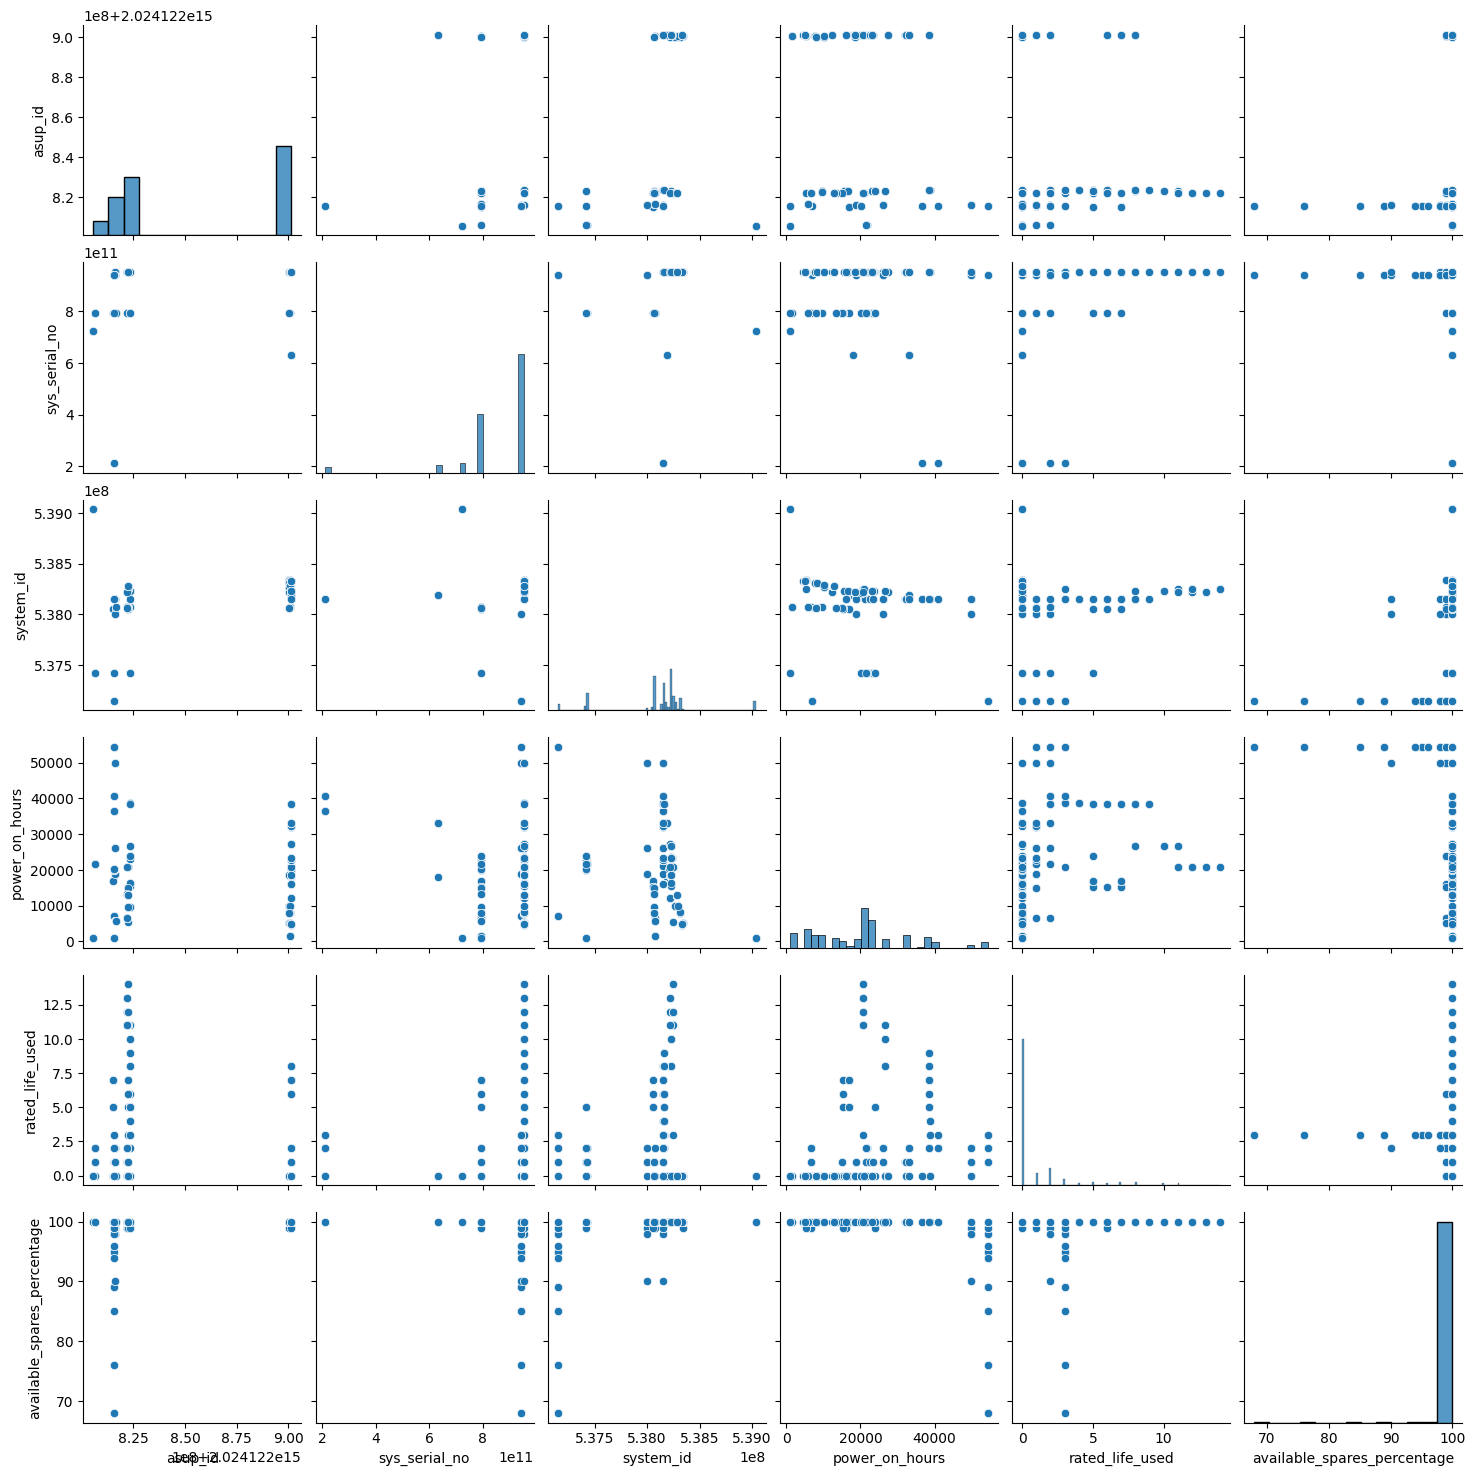

In [77]:
# Corr matrix
corr = df[num_cols].corr().abs()
high_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = high_corr.stack().reset_index()
high_corr.columns = ['feature1', 'feature2', 'corr']
print(high_corr.sort_values(by='corr', ascending=False))
print()

# Pairplot head numeric
sns.pairplot(df[num_cols[:6]])
plt.savefig('pairplot.png')
plt.show()

In [78]:
from pandas.plotting import parallel_coordinates

num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

numeric_subset = num_cols[:6]

for col in cat_cols:

    # Skip cat w/ too many !val
    if df[col].nunique() > 10:
        print(f"Skipping {col} (too many categories: {df[col].nunique()})")
        continue

    #print(f"\nPlotting parallel coordinates for categorical variable: {col}")

    plot_df = df[[col] + numeric_subset].copy()

    # Drop missing or weird vals
    plot_df = plot_df.dropna()

    # Generate the plot
    plt.figure(figsize=(12, 6))
    parallel_coordinates(plot_df, class_column=col)
    plt.title(f"Parallel Coordinates by {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.savefig(f'parallel_coordinates_{col}.png')
    #plt.show()
    plt.close()

Skipping dvc_serial_no (too many categories: 1515)
Skipping dvc_model (too many categories: 19)
Skipping disk_id (too many categories: 975)
Skipping aggr_name (too many categories: 82)
Skipping aggr_uuid (too many categories: 82)
Skipping disklist (too many categories: 81)
Skipping raid_group (too many categories: 82)
Skipping hostname (too many categories: 67)
Skipping cluster_id (too many categories: 26)
Skipping local_node_uuid (too many categories: 69)


In [79]:
#Baseline Model

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

target = "rated_life_used"

X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

lin_reg = model.named_steps['regressor']
print("Intercept:", lin_reg.intercept_)
print("Number of coefficients:", len(lin_reg.coef_))
print("Coefficients:", lin_reg.coef_)


RMSE: 0.13621563348474303
R²: 0.9961382693831315
Intercept: 0.9559813074282381
Number of coefficients: 2796
Coefficients: [0.02145277 0.08217208 0.1213174  ... 0.02162262 0.06120792 0.00491454]
